In [53]:
import pandas as pd
import re
import string

def clean_text(text):
    if not isinstance(text, str):
        return text
    
    # Удаляем эмодзи (используя регулярное выражение)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    
    # Удаляем знаки препинания
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Удаляем лишние пробелы
    text = ' '.join(text.split())
    
    return text

# Читаем CSV файл
df = pd.read_csv('data.csv')

# Заменяем 0 на NaN для корректного анализа
df[satisfaction_metrics] = df[satisfaction_metrics].replace(0, pd.NA)

# Очищаем колонку с комментариями
df['comment'] = df['comment'].apply(clean_text)

# Показываем первые 10 строк для проверки результата
print("Первые 10 строк очищенных данных:")
print(df[['comment']].head(10))

# Сохраняем очищенные данные в новый файл
df.to_csv('cleaned_data.csv', index=False)

Первые 10 строк очищенных данных:
                                     comment
0                                    спасибо
1                                    спасибо
2                                    Отлично
3  Благодарю за оперативное решение проблемы
4       Прекрасный специалист Побольше таких
5                                    Спасибо
6                        пересчет и скорость
7        Спасибо за обновление покраски стен
8                           выполнили быстро
9                                    Спасибо


=== Базовая информация о данных ===

Размер датасета:
(2373, 9)

Информация о колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   comment                               2373 non-null   object 
 1   id                                    2373 non-null   object 
 2   rating                                2373 non-null   float64
 3   Вопрос решен                          2373 non-null   int64  
 4   Нравится качество выполнения заявки   2373 non-null   int64  
 5   Нравится качество работы сотрудников  2373 non-null   int64  
 6   Нравится скорость отработки заявок    2373 non-null   int64  
 7   Понравилось выполнение заявки         2373 non-null   int64  
 8   Работа не выполнена                   2373 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 167.0+ KB
None


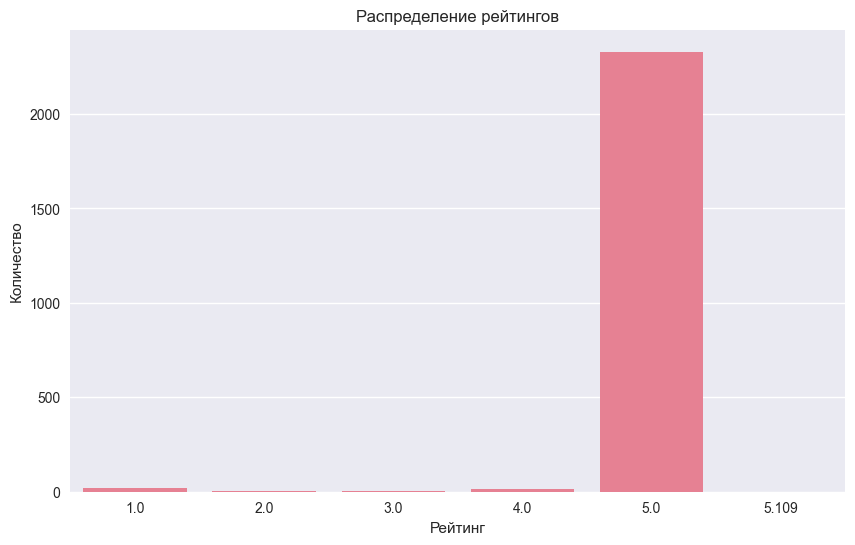


=== Анализ длины комментариев ===

Статистика длины комментариев:
count    2373.000000
mean       39.221660
std        40.293817
min         2.000000
25%        15.000000
50%        27.000000
75%        49.000000
max       431.000000
Name: comment_length, dtype: float64


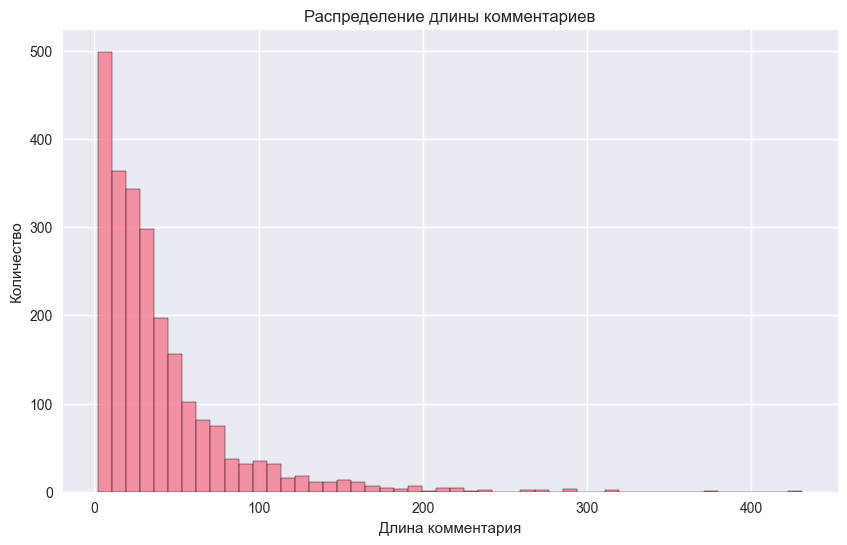


=== Анализ метрик удовлетворенности ===

Вопрос решен:
Вопрос решен
1    84.3
0    15.7
Name: proportion, dtype: float64

Нравится качество выполнения заявки:
Нравится качество выполнения заявки
0    92.1
1     7.9
Name: proportion, dtype: float64

Нравится качество работы сотрудников:
Нравится качество работы сотрудников
0    82.0
1    18.0
Name: proportion, dtype: float64

Нравится скорость отработки заявок:
Нравится скорость отработки заявок
0    72.1
1    27.9
Name: proportion, dtype: float64

Понравилось выполнение заявки:
Понравилось выполнение заявки
0    52.5
1    47.5
Name: proportion, dtype: float64

Работа не выполнена:
Работа не выполнена
0    91.8
1     8.2
Name: proportion, dtype: float64


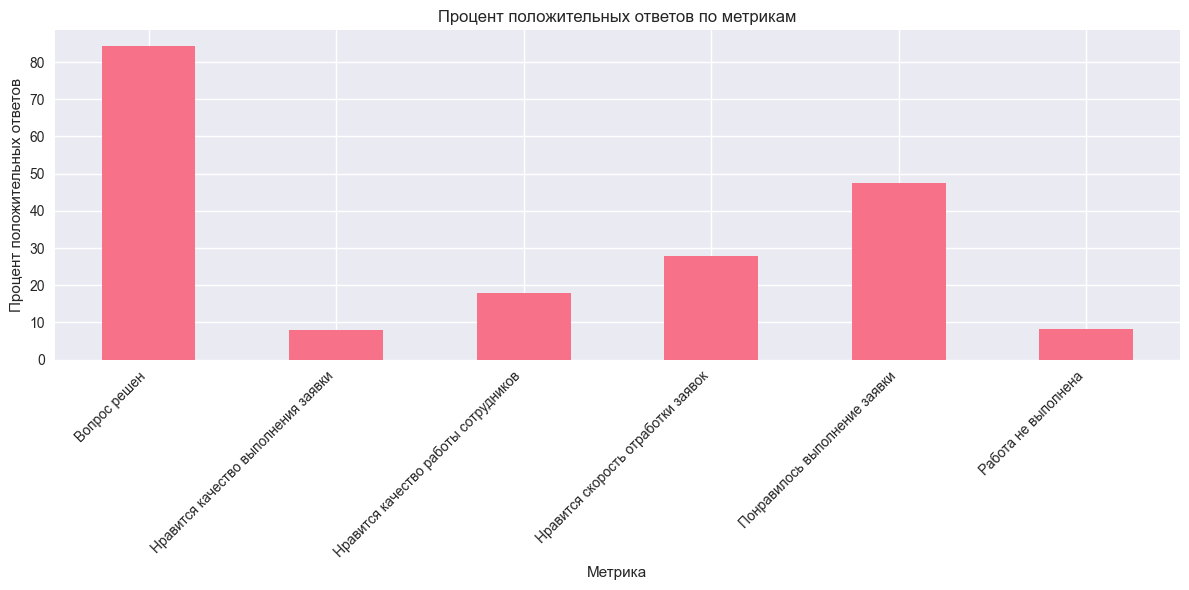


=== Корреляция между метриками ===


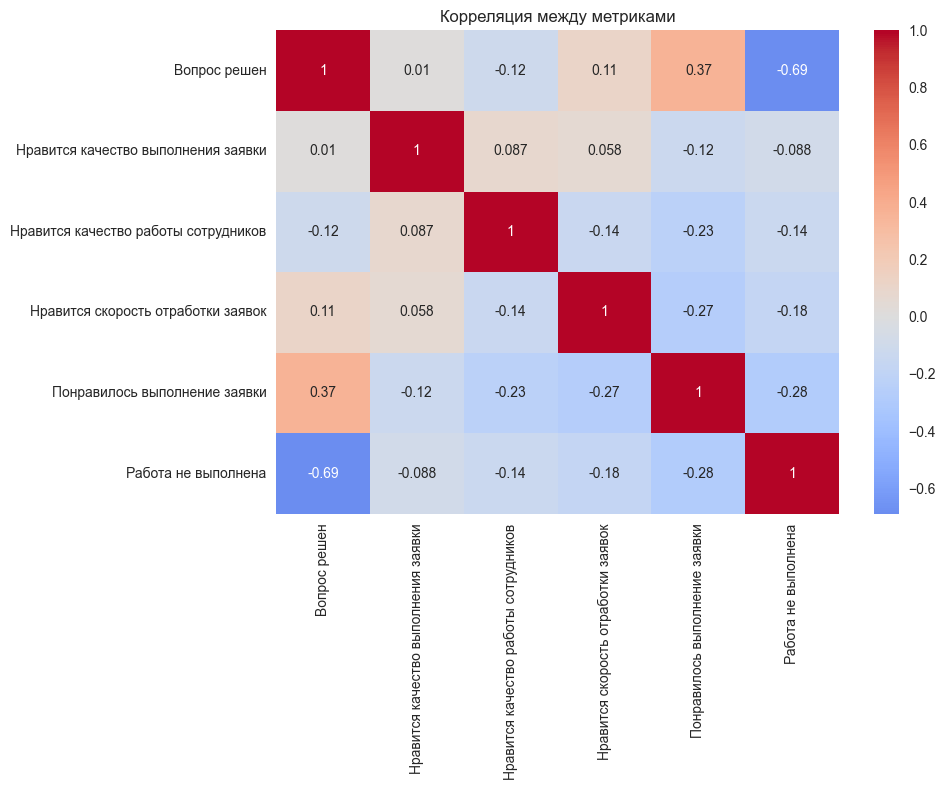


=== Анализ рейтинга и метрик ===

Средний рейтинг для Вопрос решен:
Вопрос решен
0    4.962659
1    4.953523
Name: rating, dtype: float64

Средний рейтинг для Нравится качество выполнения заявки:
Нравится качество выполнения заявки
0    4.951559
1    4.994652
Name: rating, dtype: float64

Средний рейтинг для Нравится качество работы сотрудников:
Нравится качество работы сотрудников
0    4.946127
1    4.995305
Name: rating, dtype: float64

Средний рейтинг для Нравится скорость отработки заявок:
Нравится скорость отработки заявок
0    4.950941
1    4.965309
Name: rating, dtype: float64

Средний рейтинг для Понравилось выполнение заявки:
Понравилось выполнение заявки
0    4.919028
1    4.994676
Name: rating, dtype: float64

Средний рейтинг для Работа не выполнена:
Работа не выполнена
0    4.954596
1    4.958974
Name: rating, dtype: float64


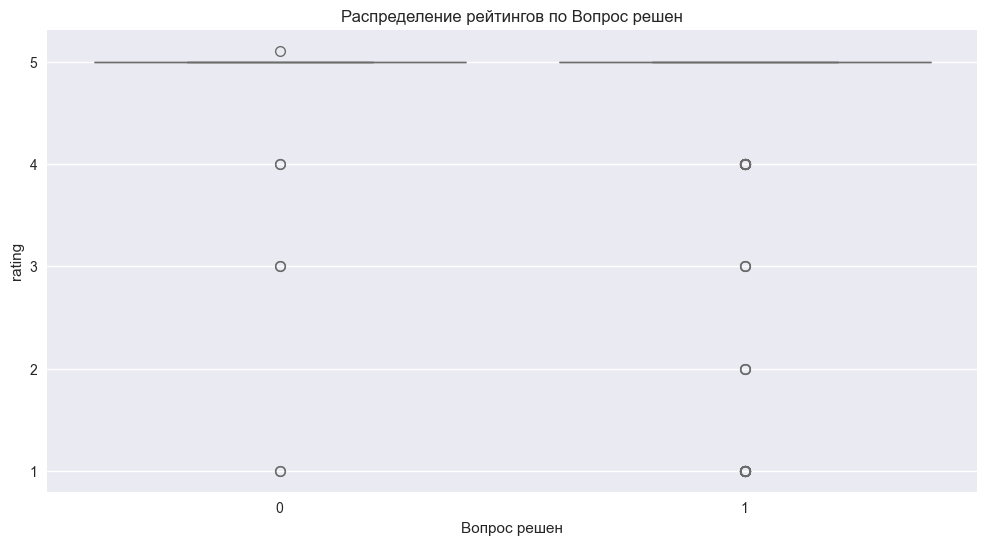

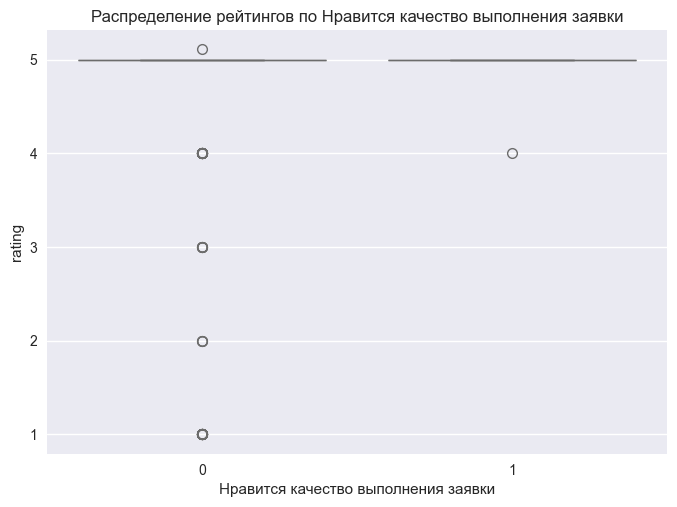

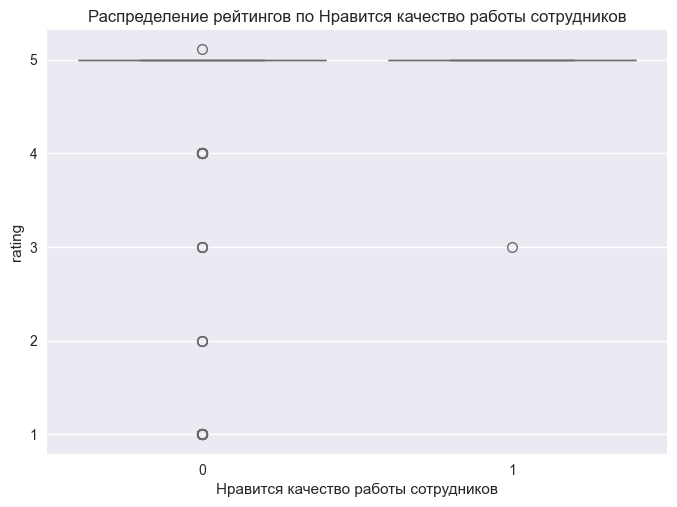

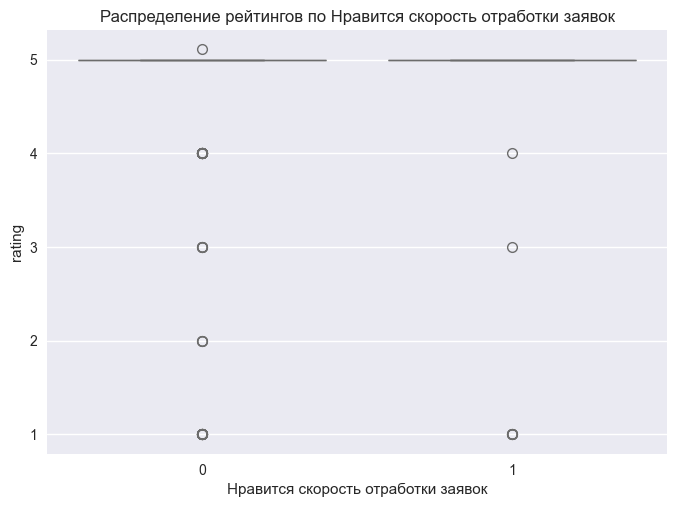

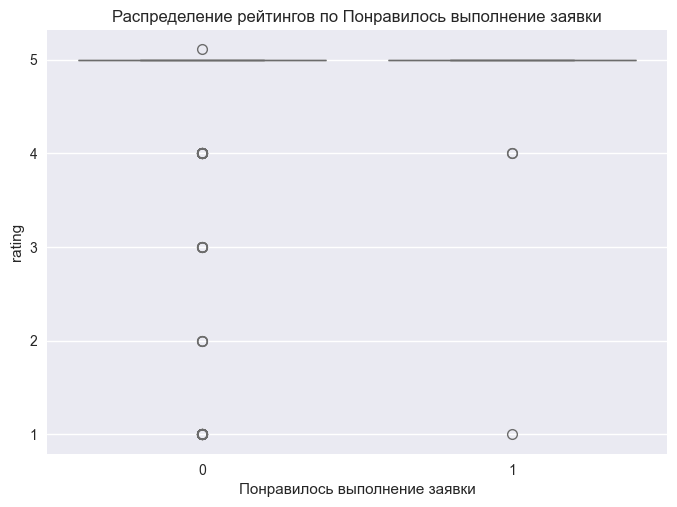

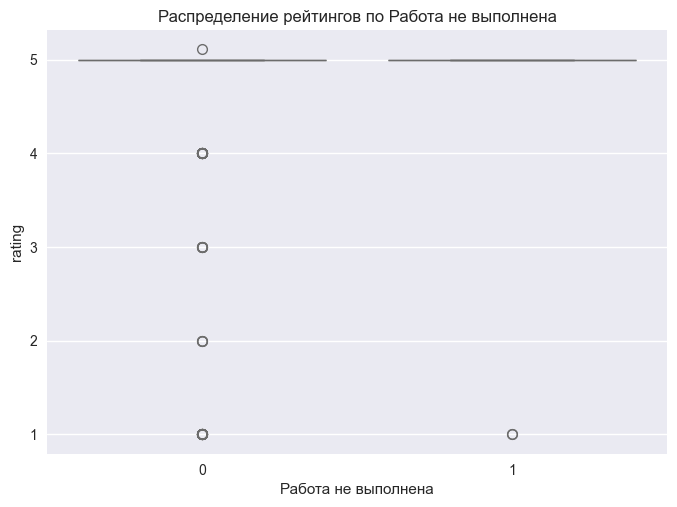

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Читаем данные
df = pd.read_csv('data.csv')

# 1. Базовая информация о данных
print("=== Базовая информация о данных ===")
print("\nРазмер датасета:")
print(df.shape)
print("\nИнформация о колонках:")
print(df.info())
print("\nСтатистическое описание числовых колонок:")
print(df.describe())

# 2. Анализ рейтингов
print("\n=== Анализ рейтингов ===")
print("\nРаспределение рейтингов:")
print(df['rating'].value_counts().sort_index())

# Визуализация распределения рейтингов
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating')
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

# 3. Анализ длины комментариев
df['comment_length'] = df['comment'].str.len()
print("\n=== Анализ длины комментариев ===")
print("\nСтатистика длины комментариев:")
print(df['comment_length'].describe())

# Визуализация распределения длины комментариев
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='comment_length', bins=50)
plt.title('Распределение длины комментариев')
plt.xlabel('Длина комментария')
plt.ylabel('Количество')
plt.show()

# 4. Анализ метрик удовлетворенности
print("\n=== Анализ метрик удовлетворенности ===")
satisfaction_metrics = [
    'Вопрос решен',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Нравится скорость отработки заявок',
    'Понравилось выполнение заявки',
    'Работа не выполнена'
]

for metric in satisfaction_metrics:
    print(f"\n{metric}:")
    print(df[metric].value_counts(normalize=True).round(3) * 100)

# Визуализация метрик удовлетворенности
plt.figure(figsize=(12, 6))
satisfaction_data = df[satisfaction_metrics].mean() * 100
satisfaction_data.plot(kind='bar')
plt.title('Процент положительных ответов по метрикам')
plt.xlabel('Метрика')
plt.ylabel('Процент положительных ответов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Корреляция между метриками
print("\n=== Корреляция между метриками ===")
correlation = df[satisfaction_metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между метриками')
plt.tight_layout()
plt.show()

# 6. Анализ рейтинга и метрик
print("\n=== Анализ рейтинга и метрик ===")
for metric in satisfaction_metrics:
    print(f"\nСредний рейтинг для {metric}:")
    print(df.groupby(metric)['rating'].mean())

# Визуализация связи рейтинга с метриками
plt.figure(figsize=(12, 6))
for metric in satisfaction_metrics:
    sns.boxplot(data=df, x=metric, y='rating')
    plt.title(f'Распределение рейтингов по {metric}')
    plt.show()

In [55]:
russian_stop_words = {
    'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она',
    'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее',
    'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда',
    'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до',
    'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей',
    'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем',
    'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет',
    'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь',
    'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем',
    'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после',
    'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много',
    'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда',
    'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю',
    'между'
}

=== Анализ самых частых слов в комментариях ===

Топ-20 самых частых слов:
спасибо: 1363
за: 413
и: 409
быстро: 369
все: 281
большое: 273
оперативно: 266
не: 221
в: 217
очень: 185
оперативность: 138
что: 126
на: 126
отлично: 112
благодарю: 112
всё: 108
мастер: 95
качественно: 93
огромное: 81
вопрос: 74

=== Анализ распределения рейтингов ===


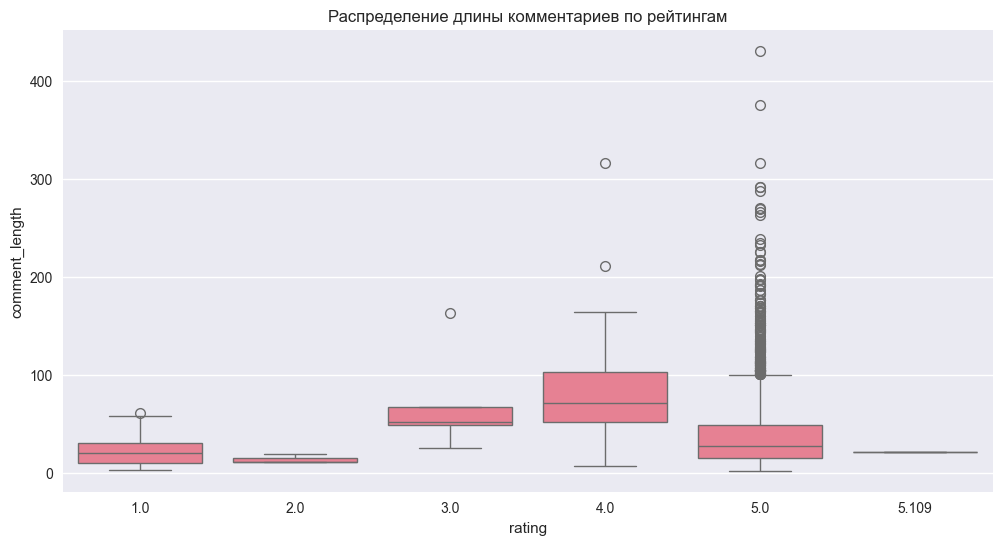


=== Анализ комбинаций метрик ===


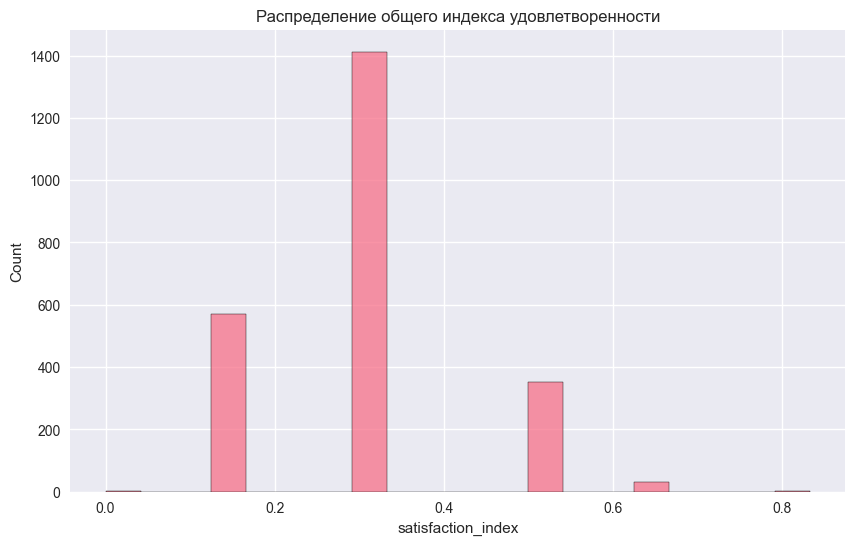


=== Анализ негативных отзывов (рейтинг <= 3) ===

Количество негативных отзывов: 26

Распределение причин негативных отзывов:

Вопрос решен:
Вопрос решен
1    84.6
0    15.4
Name: proportion, dtype: float64

Нравится качество выполнения заявки:
Нравится качество выполнения заявки
0    100.0
Name: proportion, dtype: float64

Нравится качество работы сотрудников:
Нравится качество работы сотрудников
0    96.2
1     3.8
Name: proportion, dtype: float64

Нравится скорость отработки заявок:
Нравится скорость отработки заявок
0    76.9
1    23.1
Name: proportion, dtype: float64

Понравилось выполнение заявки:
Понравилось выполнение заявки
0    96.2
1     3.8
Name: proportion, dtype: float64

Работа не выполнена:
Работа не выполнена
0    92.3
1     7.7
Name: proportion, dtype: float64

=== Анализ длинных комментариев (топ-10 по длине) ===

Топ-10 самых длинных комментариев:

Рейтинг: 5.0
Комментарий: 16.03.2024 г ребята установили кондиционер. работа сделана качественно, без лишнего шума, гр

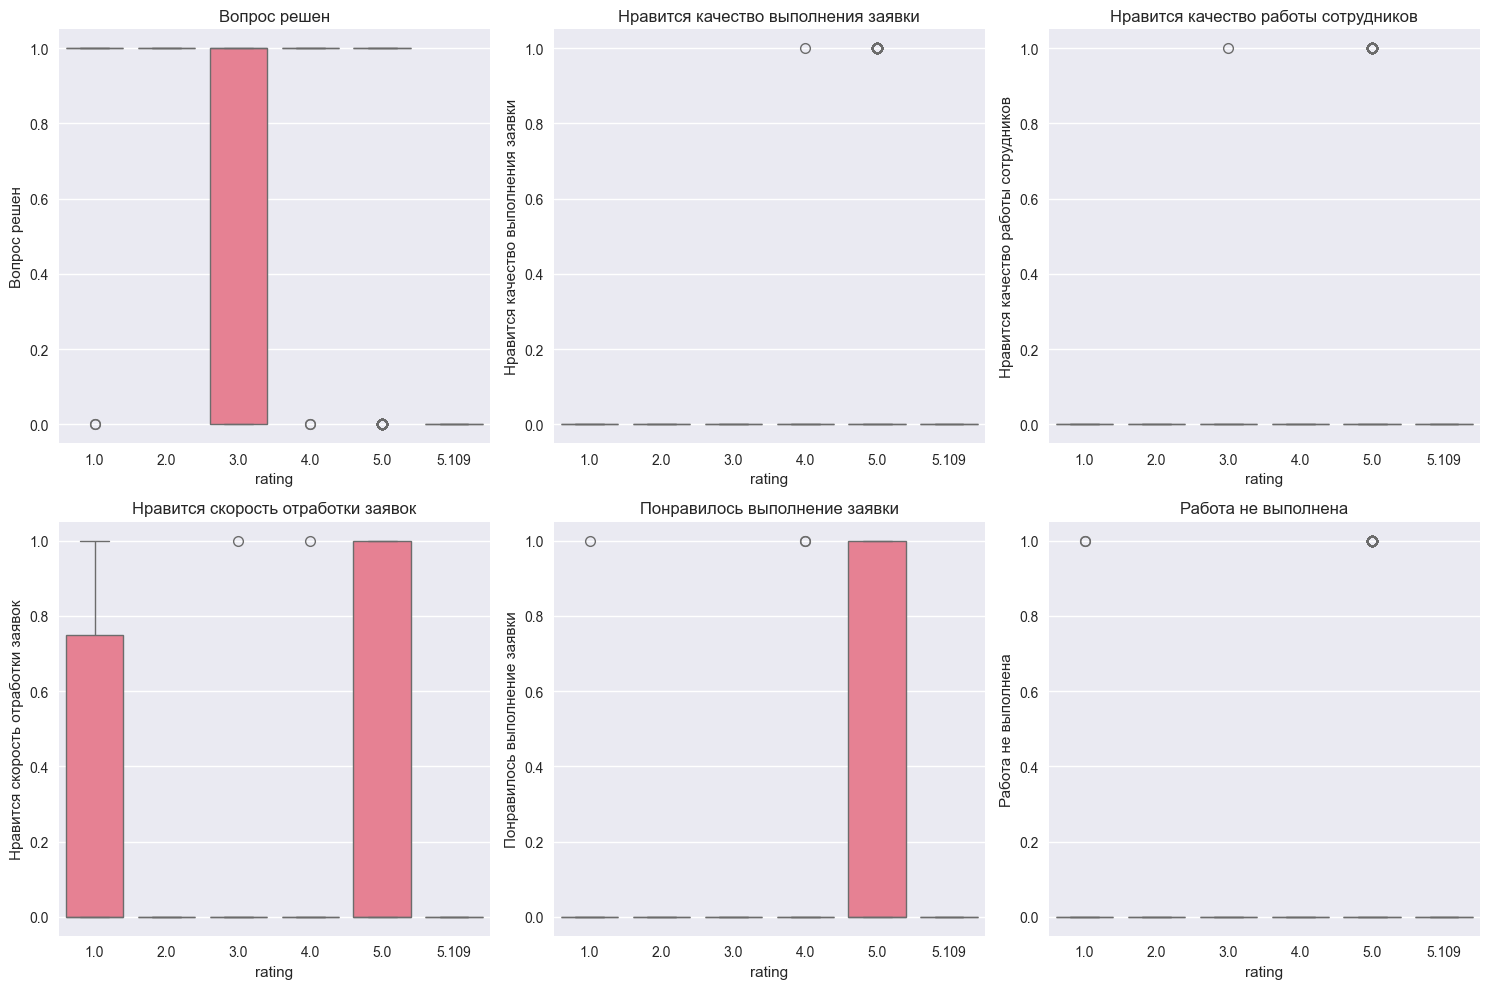


=== Анализ полноты данных ===

Количество пропущенных значений:
comment                                 0
id                                      0
rating                                  0
Вопрос решен                            0
Нравится качество выполнения заявки     0
Нравится качество работы сотрудников    0
Нравится скорость отработки заявок      0
Понравилось выполнение заявки           0
Работа не выполнена                     0
comment_length                          0
satisfaction_index                      0
dtype: int64

=== Анализ распределения рейтингов по метрикам ===

Вопрос решен:
              mean  count   std
Вопрос решен                   
0             4.96    372  0.33
1             4.95   2001  0.39

Нравится качество выполнения заявки:
                                     mean  count   std
Нравится качество выполнения заявки                   
0                                    4.95   2186  0.40
1                                    4.99    187  0.07

Нравит

In [56]:
import seaborn as sns
from collections import Counter
import re

# Устанавливаем стиль для графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Читаем данные
df = pd.read_csv('data.csv')

# 1. Анализ самых частых слов в комментариях
print("=== Анализ самых частых слов в комментариях ===")
# Объединяем все комментарии в один текст
all_comments = ' '.join(df['comment'].dropna().astype(str))
# Разбиваем на слова и считаем частоту
words = re.findall(r'\b\w+\b', all_comments.lower())
word_freq = Counter(words)
# Выводим топ-20 самых частых слов
print("\nТоп-20 самых частых слов:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

# 2. Анализ распределения рейтингов по времени (если есть временные данные)
print("\n=== Анализ распределения рейтингов ===")
df['comment_length'] = df['comment'].astype(str).apply(len)  # <--- добавьте эту строку
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='rating', y='comment_length')
plt.title('Распределение длины комментариев по рейтингам')
plt.show()

# 3. Анализ комбинаций метрик
print("\n=== Анализ комбинаций метрик ===")
# Создаем новую метрику - общий индекс удовлетворенности
df['satisfaction_index'] = df[satisfaction_metrics].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='satisfaction_index', bins=20)
plt.title('Распределение общего индекса удовлетворенности')
plt.show()

# 4. Анализ негативных отзывов
print("\n=== Анализ негативных отзывов (рейтинг <= 3) ===")
negative_reviews = df[df['rating'] <= 3]
print(f"\nКоличество негативных отзывов: {len(negative_reviews)}")
print("\nРаспределение причин негативных отзывов:")
for metric in satisfaction_metrics:
    print(f"\n{metric}:")
    print(negative_reviews[metric].value_counts(normalize=True).round(3) * 100)

# 5. Анализ длинных комментариев
print("\n=== Анализ длинных комментариев (топ-10 по длине) ===")
long_comments = df.nlargest(10, 'comment_length')
print("\nТоп-10 самых длинных комментариев:")
for idx, row in long_comments.iterrows():
    print(f"\nРейтинг: {row['rating']}")
    print(f"Комментарий: {row['comment']}")

# 6. Анализ корреляции между длиной комментария и рейтингом
print("\n=== Анализ корреляции между длиной комментария и рейтингом ===")
correlation = df['comment_length'].corr(df['rating'])
print(f"\nКорреляция: {correlation:.3f}")

# 7. Анализ распределения метрик по рейтингам
print("\n=== Анализ распределения метрик по рейтингам ===")
plt.figure(figsize=(15, 10))
for i, metric in enumerate(satisfaction_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='rating', y=metric)
    plt.title(metric)
plt.tight_layout()
plt.show()

# 8. Анализ полноты данных
print("\n=== Анализ полноты данных ===")
missing_data = df.isnull().sum()
print("\nКоличество пропущенных значений:")
print(missing_data)

# 9. Анализ распределения рейтингов по метрикам
print("\n=== Анализ распределения рейтингов по метрикам ===")
for metric in satisfaction_metrics:
    print(f"\n{metric}:")
    print(df.groupby(metric)['rating'].agg(['mean', 'count', 'std']).round(2))

# 10. Создание сводной таблицы по всем метрикам
print("\n=== Сводная таблица по всем метрикам ===")
pivot_table = df.pivot_table(
    values='rating',
    index=satisfaction_metrics,
    aggfunc=['mean', 'count', 'std']
).round(2)
print(pivot_table)

In [65]:
# Добавляем новые импорты
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Добавляем новые модели
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False),
    'Stacking': StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100)),
            ('svm', SVC(probability=True)),
            ('nb', MultinomialNB())
        ],
        final_estimator=LogisticRegression()
    )
}

# Обучение и оценка моделей с проверкой переобучения
results = {}

for name, model in models.items():
    print(f"\nОбучение {name}...")
    
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Получение предсказаний для обучающей и тестовой выборок
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Расчет метрик для обучающей и тестовой выборок
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    # Кросс-валидация
    cv_f1 = cross_val_score(model, X_tfidf, y, cv=5, scoring='f1').mean()
    cv_roc_auc = cross_val_score(model, X_tfidf, y, cv=5, scoring='roc_auc').mean()
    
    # Сохранение результатов
    results[name] = {
        'Train F1': train_f1,
        'Test F1': test_f1,
        'Train ROC-AUC': train_roc_auc,
        'Test ROC-AUC': test_roc_auc,
        'CV F1': cv_f1,
        'CV ROC-AUC': cv_roc_auc
    }
    
    # Вывод детального отчета
    print(f"\nОтчет о классификации для {name}:")
    print("\nНа тестовой выборке:")
    print(classification_report(y_test, y_test_pred))
    
    # Построение кривой обучения
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_tfidf, y, cv=5, scoring='f1',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Обучающая выборка')
    plt.plot(train_sizes, test_mean, label='Тестовая выборка')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title(f'Кривая обучения для {name}')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('F1 Score')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Создание DataFrame с результатами
results_df = pd.DataFrame(results).T

# Визуализация сравнения метрик
plt.figure(figsize=(15, 6))

# График F1 scores
plt.subplot(1, 2, 1)
x = np.arange(len(results_df))
width = 0.35
plt.bar(x - width/2, results_df['Train F1'], width, label='Train')
plt.bar(x + width/2, results_df['Test F1'], width, label='Test')
plt.title('Сравнение F1 Scores')
plt.xticks(x, results_df.index, rotation=45)
plt.legend()
plt.ylim(0, 1)

# График ROC-AUC scores
plt.subplot(1, 2, 2)
plt.bar(x - width/2, results_df['Train ROC-AUC'], width, label='Train')
plt.bar(x + width/2, results_df['Test ROC-AUC'], width, label='Test')
plt.title('Сравнение ROC-AUC Scores')
plt.xticks(x, results_df.index, rotation=45)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Вывод итоговых результатов
print("\nИтоговые результаты:")
print(results_df)

# Анализ переобучения
print("\nАнализ переобучения:")
for name in results_df.index:
    f1_diff = results_df.loc[name, 'Train F1'] - results_df.loc[name, 'Test F1']
    roc_diff = results_df.loc[name, 'Train ROC-AUC'] - results_df.loc[name, 'Test ROC-AUC']
    print(f"\n{name}:")
    print(f"Разница F1 (Train - Test): {f1_diff:.3f}")
    print(f"Разница ROC-AUC (Train - Test): {roc_diff:.3f}")
    if f1_diff > 0.1 or roc_diff > 0.1:
        print("ВНИМАНИЕ: Возможно переобучение!")
    else:
        print("Переобучения не обнаружено")

ModuleNotFoundError: No module named 'xgboost'


Обучение модели для категории: Нравится скорость отработки заявок
ROC-AUC: 0.961
F1-Score: 0.816

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       345
           1       0.77      0.87      0.82       130

    accuracy                           0.89       475
   macro avg       0.86      0.89      0.87       475
weighted avg       0.90      0.89      0.89       475


Топ-10 важных слов для категории:
оперативно: 6.304
быстро: 5.230
оперативность: 3.537
за оперативность: 3.397
отреагировали: 2.122
оперативное: 2.041
скорость: 1.988
за: 1.910
очень оперативно: 1.897
среагировали: 1.793

Обучение модели для категории: Нравится качество выполнения заявки
ROC-AUC: 0.745
F1-Score: 0.189

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       450
           1       0.13      0.36      0.19        25

    accuracy                           0.8

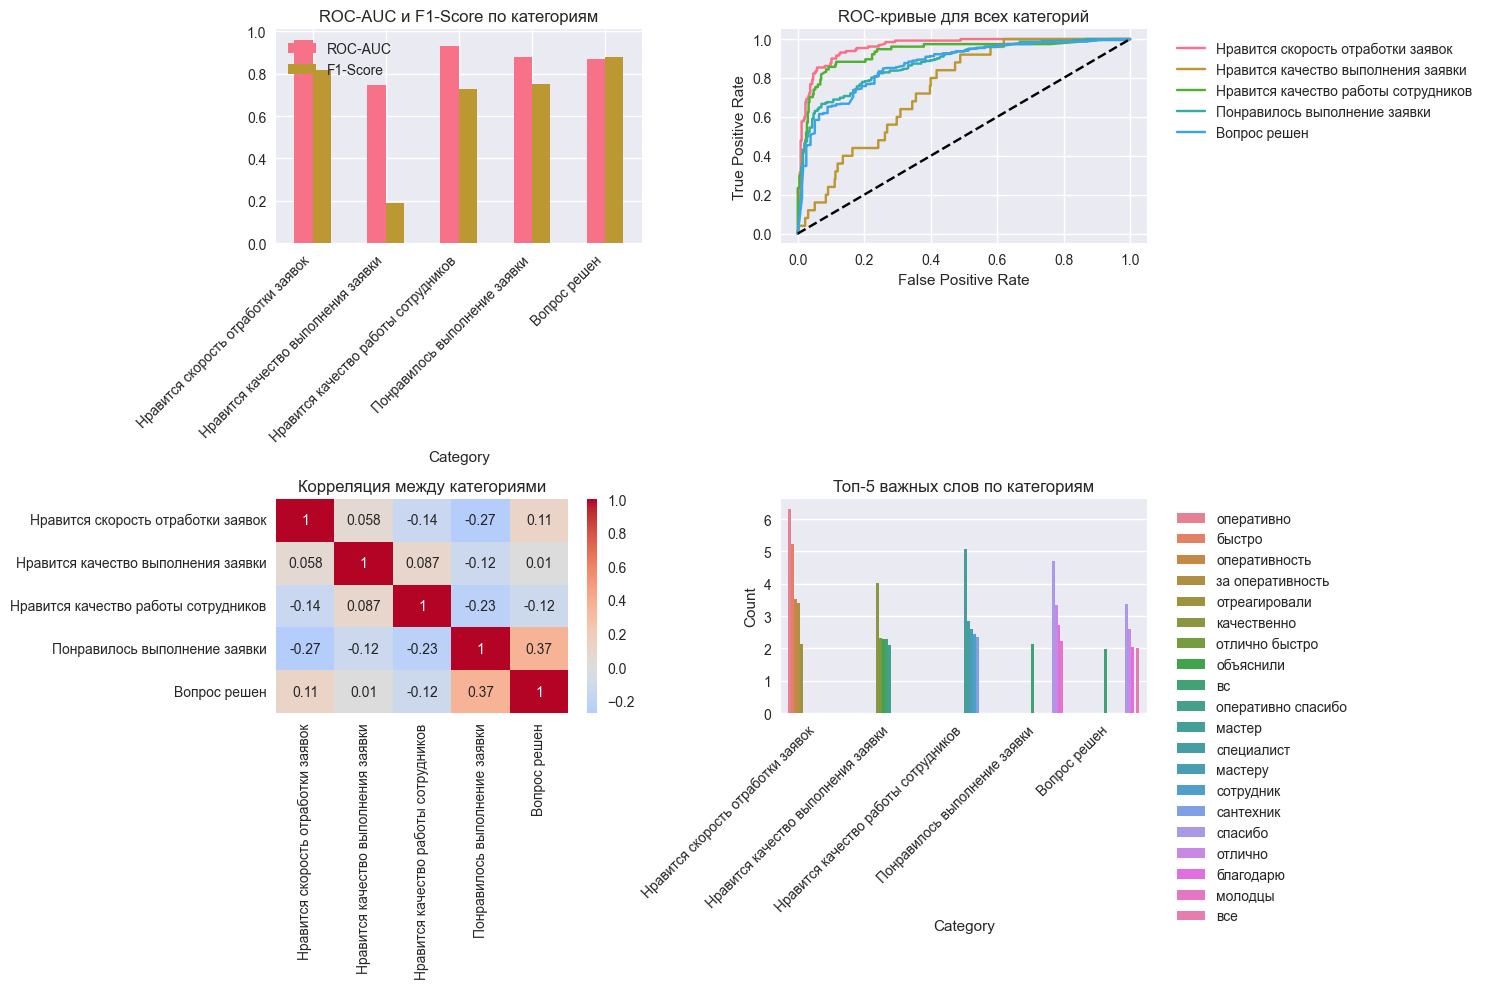

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, classification_report, roc_curve
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('data.csv')

# Определение категорий
categories = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен'
]

# Расширенная предобработка текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление специальных символов и цифр
    text = re.sub(r'[^а-яА-Я\s]', '', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применяем предобработку к комментариям
df['processed_comment'] = df['comment'].apply(preprocess_text)

# Создаем словарь важных слов для каждой категории
important_words = {
    'Нравится скорость отработки заявок': ['быстро', 'оперативно', 'оперативность', 'скорость'],
    'Нравится качество выполнения заявки': ['качественно', 'качество', 'хорошо', 'отлично'],
    'Нравится качество работы сотрудников': ['мастер', 'специалист', 'сотрудник', 'работник'],
    'Понравилось выполнение заявки': ['спасибо', 'благодарю', 'отлично', 'хорошо'],
    'Вопрос решен': ['решен', 'решили', 'выполнили', 'сделали']
}

# Добавляем признаки на основе важных слов
for category, words in important_words.items():
    df[f'{category}_word_count'] = df['processed_comment'].apply(
        lambda x: sum(1 for word in words if word in x)
    )

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_comment'],
    df[categories],
    test_size=0.2,
    random_state=42,
    stratify=df[categories].max(axis=1)  # Стратификация по наличию хотя бы одной положительной метки
)

# Создание и обучение моделей для каждой категории
models = {}
results = {}

for category in categories:
    print(f"\nОбучение модели для категории: {category}")
    
    # Создаем pipeline с подбором гиперпараметров
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),  # Используем униграммы и биграммы
            min_df=2,  # Минимальная частота слова
            max_df=0.95  # Максимальная частота слова
        )),
        ('classifier', LogisticRegression(
            class_weight='balanced',  # Учитываем дисбаланс классов
            max_iter=1000,
            random_state=42
        ))
    ])
    
    # Обучаем модель
    pipeline.fit(X_train, y_train[category])
    
    # Предсказания
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Оценка модели
    roc_auc = roc_auc_score(y_test[category], y_pred_proba)
    f1 = f1_score(y_test[category], y_pred)
    
    # Сохраняем результаты
    models[category] = pipeline
    results[category] = {
        'roc_auc': roc_auc,
        'f1_score': f1
    }
    
    print(f"ROC-AUC: {roc_auc:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test[category], y_pred))
    
    # Выводим важные слова для категории
    feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
    coefficients = pipeline.named_steps['classifier'].coef_[0]
    important_features = sorted(zip(coefficients, feature_names), reverse=True)[:10]
    print("\nТоп-10 важных слов для категории:")
    for coef, word in important_features:
        print(f"{word}: {coef:.3f}")

# Вывод итоговых результатов
print("\nИтоговые результаты по всем категориям:")
for category in categories:
    print(f"\n{category}:")
    print(f"ROC-AUC: {results[category]['roc_auc']:.3f}")
    print(f"F1-Score: {results[category]['f1_score']:.3f}")

# Добавьте сюда новый код для графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру для графиков
plt.figure(figsize=(15, 10))

# 1. График ROC-AUC и F1-score по категориям
plt.subplot(2, 2, 1)
categories_metrics = pd.DataFrame({
    'Category': categories,
    'ROC-AUC': [results[cat]['roc_auc'] for cat in categories],
    'F1-Score': [results[cat]['f1_score'] for cat in categories]
})
categories_metrics.set_index('Category').plot(kind='bar', ax=plt.gca())
plt.title('ROC-AUC и F1-Score по категориям')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 2. ROC-кривые для каждой категории
plt.subplot(2, 2, 2)
for category in categories:
    y_pred_proba = models[category].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test[category], y_pred_proba)
    plt.plot(fpr, tpr, label=category)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для всех категорий')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 3. Матрица корреляции между категориями
plt.subplot(2, 2, 3)
correlation_matrix = df[categories].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между категориями')
plt.tight_layout()

# 4. Распределение важных слов
plt.subplot(2, 2, 4)
word_counts = pd.DataFrame({
    'Category': [],
    'Word': [],
    'Count': []
})

for category in categories:
    feature_names = models[category].named_steps['tfidf'].get_feature_names_out()
    coefficients = models[category].named_steps['classifier'].coef_[0]
    important_features = sorted(zip(coefficients, feature_names), reverse=True)[:5]
    
    for coef, word in important_features:
        word_counts = pd.concat([word_counts, pd.DataFrame({
            'Category': [category],
            'Word': [word],
            'Count': [coef]
        })])

sns.barplot(data=word_counts, x='Category', y='Count', hue='Word')
plt.title('Топ-5 важных слов по категориям')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()